In [47]:
import warnings
warnings.filterwarnings("ignore")

import cv2
import os
import matplotlib.pyplot as plt
os.listdir("E:\\lungs")

['The IQ-OTHNCCD lung cancer dataset']

In [2]:
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item),0)
        if img is not None:
            images.append([img,target])
    return images

In [3]:
benign = import_images("E:/LUNGS/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases", 0)
malignant = import_images("E:/LUNGS/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases", 1)
normal = import_images("E:/LUNGS/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases", 2)

In [4]:
benign.extend(malignant)
benign.extend(normal)

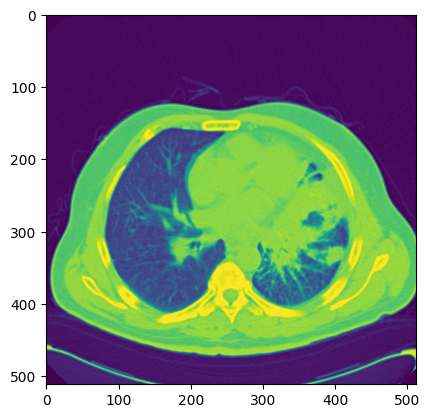

In [5]:
plt.imshow(benign[600][0])

In [6]:
full_data = benign

feature_matrix = []
label = []
for x,y in full_data:
    feature_matrix.append(x)
    label.append(y)

In [7]:
feature_matrix[0]

array([[38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38],
       ...,
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38]], dtype=uint8)

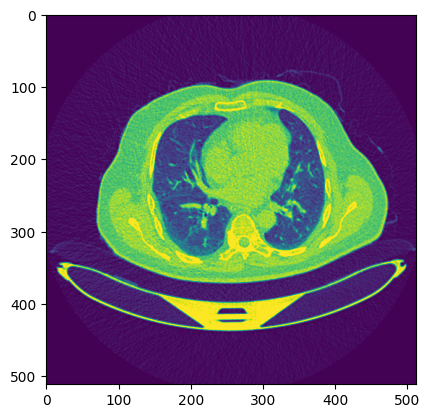

In [8]:

plt.imshow(feature_matrix[0])

In [9]:
label[0]

0

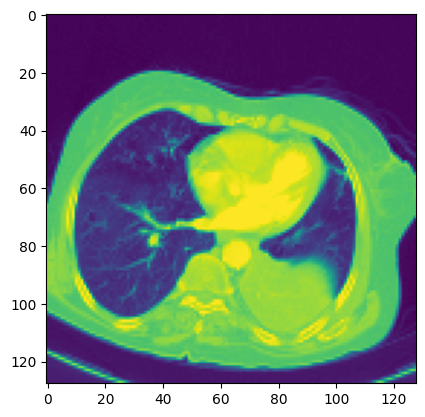

In [10]:
## resized image
X=[]
img_size=128

for x in feature_matrix:
    new_array = cv2.resize(x,(img_size,img_size))
    X.append(new_array)
    
    
plt.imshow(X[222])

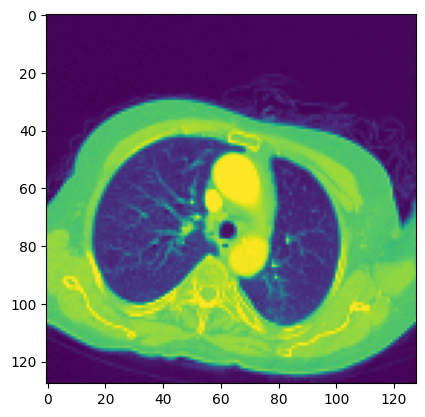

In [11]:
X_corrected = []
for image in X:
    image = image/255
    X_corrected.append(image)
plt.imshow(X_corrected[213])

In [12]:
import numpy as np
np.array(X_corrected).shape

(1097, 128, 128)

In [13]:
X_M = np.array(X_corrected)

X_M.shape[1]

128

In [14]:
print(np.array(X_corrected).shape)
print(np.array(X_corrected).shape[0])
print(np.array(X_corrected).shape[1])
print(np.array(X_corrected).shape[2])

(1097, 128, 128)
1097
128
128


In [15]:
X_M.shape

(1097, 128, 128)

In [16]:
X_M_R =X_M.reshape(X_M.shape[0],X_M.shape[1],X_M.shape[2],1)

In [17]:
X_M_R.shape

(1097, 128, 128, 1)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_M_R,label, test_size = 0.20, random_state = 42, stratify = label)

In [19]:
print("X_train size: ",X_train.shape)
print("X_test Size: ",X_test.shape)

X_train size:  (877, 128, 128, 1)
X_test Size:  (220, 128, 128, 1)


In [20]:
import sys
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Dropout

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

def define_densenet():
    model = Sequential()
    
    # Initial Convolution layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 1)))
    
    # First dense block
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second dense block
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Third dense block
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Fourth dense block
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten layer
    model.add(Flatten())
    
    # Fully connected layers
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    
    # Output layer
    model.add(Dense(3, activation='softmax'))
    
    # Compile the model
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create and compile the DenseNet model
densenet_model = define_densenet()
densenet_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,445,827 (5.52 MB)

 Trainable params: 1,445,827 (5.52 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:

# # Build the ResNet model
model = define_densenet()


# # Now you can fit the model to your data
history = model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(X_test, np.array(y_test)))


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4826 - loss: 1.9899 - val_accuracy: 0.6227 - val_loss: 0.8990
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5602 - loss: 0.8736 - val_accuracy: 0.7545 - val_loss: 0.6163
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7726 - loss: 0.6503 - val_accuracy: 0.7545 - val_loss: 0.6546
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7830 - loss: 0.5598 - val_accuracy: 0.8727 - val_loss: 0.2995
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8712 - loss: 0.2864 - val_accuracy: 0.8909 - val_loss: 0.2606
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8897 - loss: 0.2862 - val_accuracy: 0.9227 - val_loss: 0.1875
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 921ms/step - accuracy: 0.9281 - loss: 0.1866 - val_accuracy: 0.9682 - val_loss: 0.1506
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9472 - loss: 0.1696 - val_accuracy: 0.9727 - val_lo

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


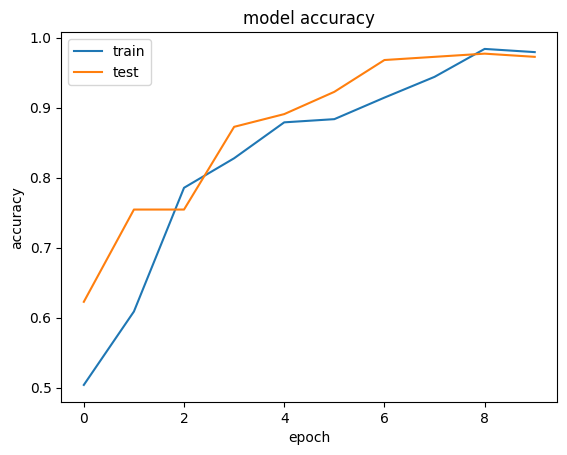

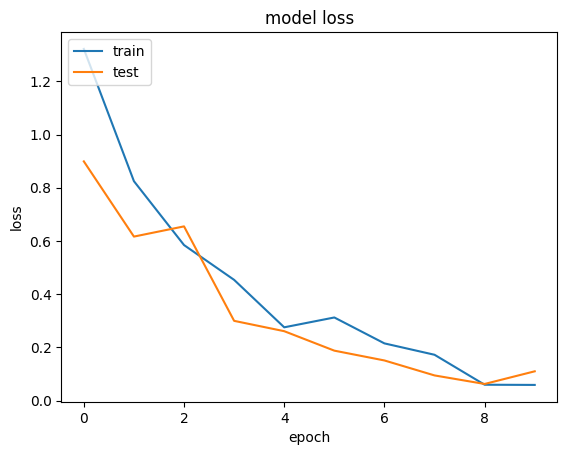

In [23]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model.evaluate(np.array(X_test),np.array(y_test))

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.9584 - loss: 0.1524


[0.10980109870433807, 0.9727272987365723]

In [25]:
predicted = []
for item in model.predict(X_test):
    predicted.append(np.argmax(item))
    
print(X_test.shape)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 492ms/step
(220, 128, 128, 1)


In [26]:
#### lebel of the X_test prediction
for item in predicted:
    print(item,)

2
2
1
2
1
2
1
2
1
1
1
1
1
1
1
2
2
2
1
1
2
2
0
1
2
2
1
2
1
1
0
1
2
1
1
0
2
0
1
1
1
1
1
1
0
0
1
1
1
0
2
1
1
1
2
1
1
2
2
2
0
1
0
2
1
2
1
2
2
1
1
2
1
1
1
1
1
1
1
2
2
2
2
1
2
1
2
2
1
1
1
1
1
2
1
2
2
0
0
2
1
1
1
2
1
0
2
1
1
2
2
1
2
2
1
1
2
0
1
2
2
1
1
2
2
1
1
2
1
2
1
1
1
0
1
0
2
1
2
1
1
1
1
2
0
2
1
1
1
1
2
1
1
2
1
2
2
1
1
1
1
1
1
1
1
2
2
1
2
2
1
1
1
0
1
1
2
2
1
1
0
2
1
2
1
1
1
2
1
2
1
1
1
2
2
2
2
1
2
2
1
1
1
2
2
0
2
2
2
1
1
2
1
1
0
1
1
0
1
2


In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_test,predicted)
conf

array([[ 21,   3,   0],
       [  0, 113,   0],
       [  0,   3,  80]], dtype=int64)

Text(0.5, 44.722222222222186, 'Predicted')

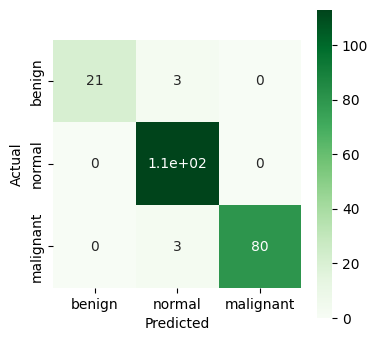

In [52]:
info = [
    'benign'   ,  # 0
    'normal'   ,  # 2
    'malignant',  # 1
]
plt.figure(figsize = (4,4))
ax = sns.heatmap(conf, cmap=plt.cm.Greens, annot=True, square=True, xticklabels = info, yticklabels = info)
ax.set_ylabel('Actual', fontsize=10)
ax.set_xlabel('Predicted', fontsize=10)

<Axes: >

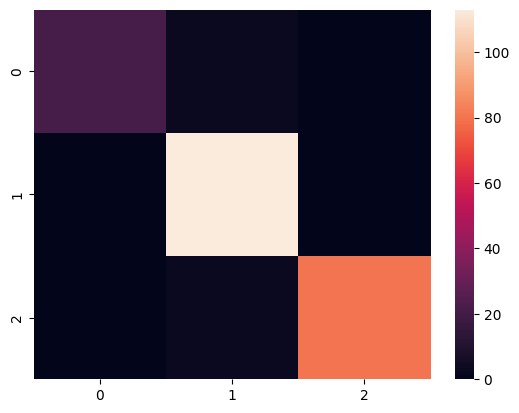

In [46]:

sns.heatmap(conf)

In [30]:
X_test.shape

(220, 128, 128, 1)

In [31]:
img = X_test[200]

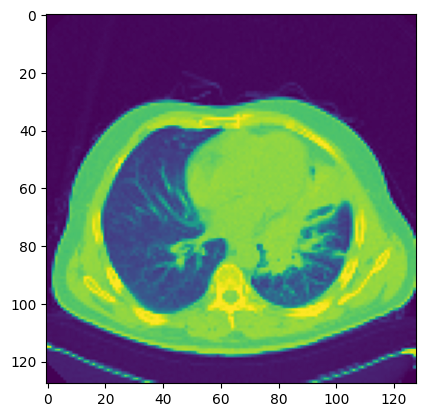

In [32]:
plt.imshow(img)

In [33]:
img1=img.reshape(1,X_M.shape[1],X_M.shape[2],1)

In [34]:
img1.shape

(1, 128, 128, 1)

In [35]:
np.argmax(model.predict(img1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


1

In [36]:
def image_prediction(img):
#     plt.imshow(img)
    img1=img.reshape(1,128,128,1)
    predict = np.argmax(model.predict(img1))
    if predict==0:
        print("Benign, the cells are not yet cancerous, but they have the potential to become malignant. Consult the doctor")
    elif predict==1:
        print("Malignant, tumors are cancerous. The cells can grow and spread to other parts of the body. Visit to the doctor as soon as possible")
    else:
        print("YOU are in Normal condition. No need to worry")
        
    

In [37]:
image_prediction(X_test[25])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
YOU are in Normal condition. No need to worry


In [38]:
image_prediction(X_test[22])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Benign, the cells are not yet cancerous, but they have the potential to become malignant. Consult the doctor


In [39]:
image_prediction(X_test[78])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Malignant, tumors are cancerous. The cells can grow and spread to other parts of the body. Visit to the doctor as soon as possible


In [40]:
image_prediction(X_test[19])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Malignant, tumors are cancerous. The cells can grow and spread to other parts of the body. Visit to the doctor as soon as possible


In [41]:
def new_prediction(img):
    
    IMG_SIZE = 128
    img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 1)

In [49]:

model.save_weights('.weights.h5')

model.save('Cancer_CNN.h5')


In [50]:
import cv2
import tensorflow as tf

CATEGORIES = ["Normal", "Benign", "Malignant"]



model = tf.keras.models.load_model("Cancer_CNN.h5")
#model1 = model.load_weights("./model.h5")
prediction = model.predict([new_prediction('E:\LUNGS\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset\Bengin cases\Bengin case (4).jpg')])
   
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
[[1. 0. 0.]]
Benign


In [44]:
predict = np.argmax(prediction)
if predict==0:
        print("Benign, the cells are not yet cancerous, but they have the potential to become malignant. Consult the doctor")
elif predict==1:
        print("Malignant, tumors are cancerous. The cells can grow and spread to other parts of the body. Visit to the doctor as soon as possible")
else:
        print("YOU are in Normal condition. No need to worry")

Benign, the cells are not yet cancerous, but they have the potential to become malignant. Consult the doctor
